# Declaration of Originality

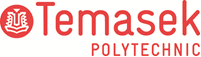

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : DELA CRUZ GABRIEL LUIS JOSE (2404629D)
* Tutorial Group                : P01
* Tutor						    : Ruchir Srivastava
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [280]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: To predict whether an individual earns more than $50,000 per year using demographic and employment-related census data. This is a binary classification problem, where the target categorises individuals as either earning less than/more than $50k per year. Income classification is a real-world problem with applications in finance, insurance and public policy. Accurate predictions can help financial institutions identify potential clients for loans or premium financial services such as premier banking and investments, assist insurance providers in assessing risk and pricing, and support government policy-makers in analysing socioeconomic trends and making the appropriate policy decisions. 

# 2. Data Understanding

## 2.1 Load dataset

In [281]:
## Read *.csv file into pandas DataFrame

df = pd.read_csv('adult.csv')

df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 2.2 Summary Statistics

In [282]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Dataset contains 48842 records with 15 columns, both categorical (object) and numerical (integer) features

In [283]:
## Check for missing data
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Most columns are complete but workclass, native-country and occupations have missing data

In [284]:
## Describe data distribution
df.describe()
df.describe(include='object')  

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

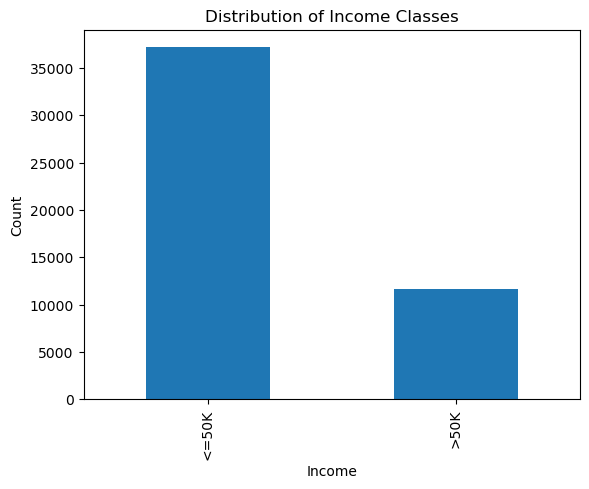

In [285]:
## Understanding distribution of target
df['income'].value_counts().plot(kind='bar')
plt.title("Distribution of Income Classes")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


The dataset is imbalanced as majority of individuals earn <=50k while a smaller portion earns >=50k, which may cause accuracy to be misleading.

### 2.3.1.2 Understanding distribution of features

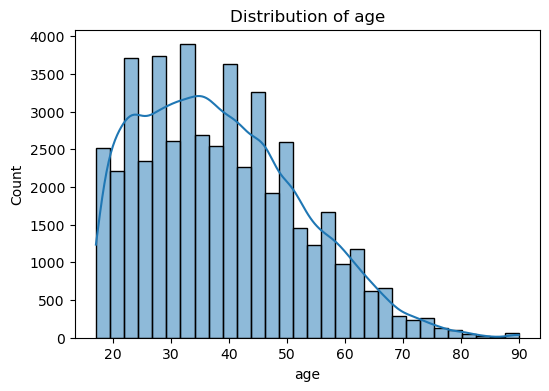

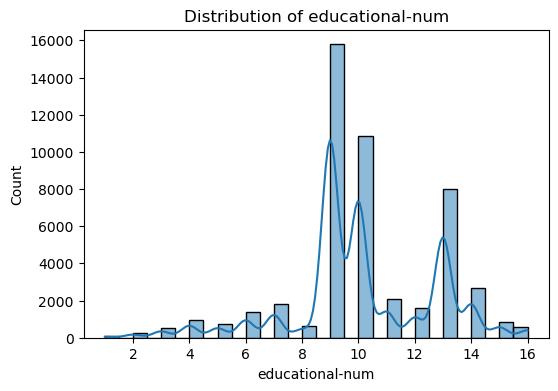

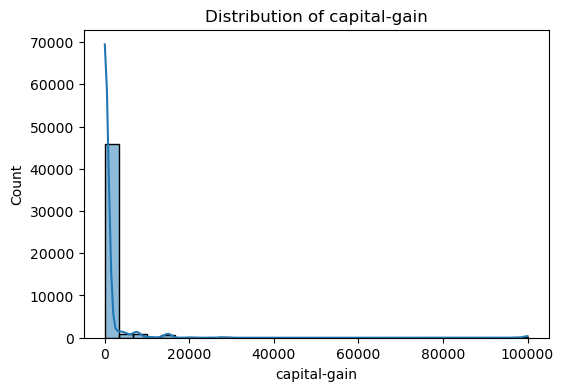

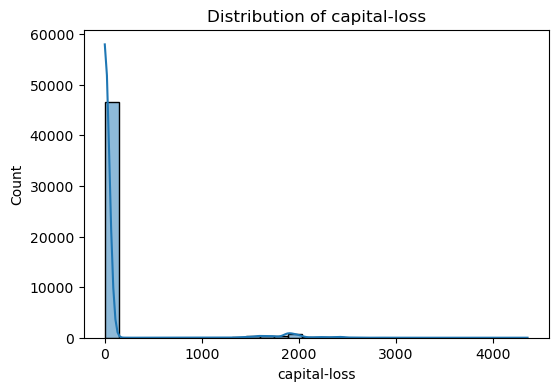

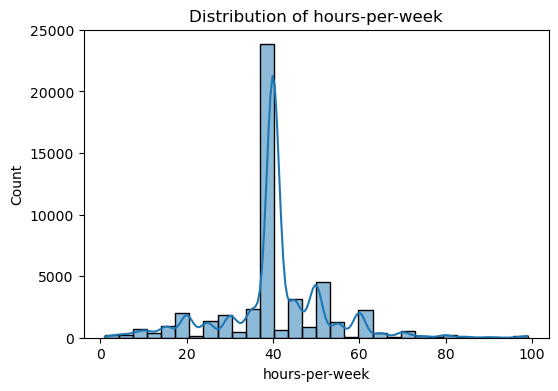

In [286]:
## Understanding distribution of features

numerical_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



- Distribution of age is slightly skewed towards younger individuals

- Distribution of educational-num (which encodes education levels as integers) is clustered around the mid-range 9-10 levels, indicating that most individuals completed high school or college. 

- Both capital-gain and capital-loss are extremely right‑skewed with almost all values equal to zero and only a small number of positive values forming long tails, indicating that only a minority of individuals report any capital gains or losses.

- Distribution of hours-per-week is discrete with a strong peak at 40 hours, indicating that most individuals work 35-45 hours.


-

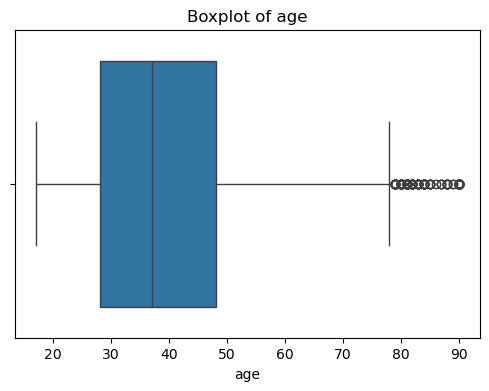

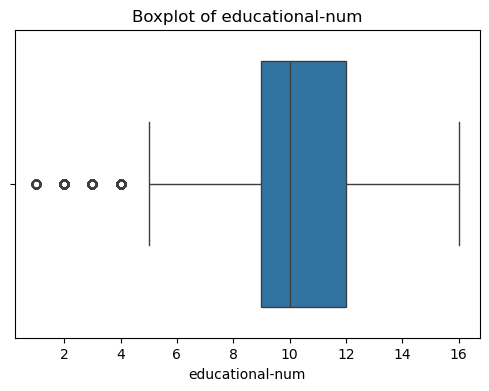

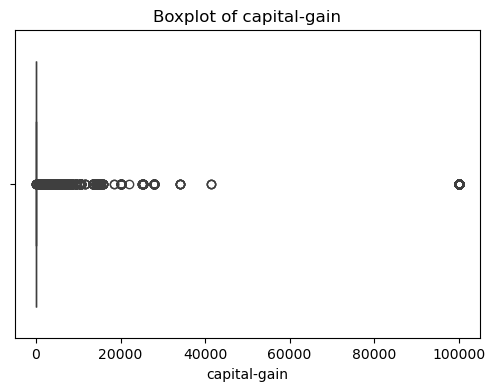

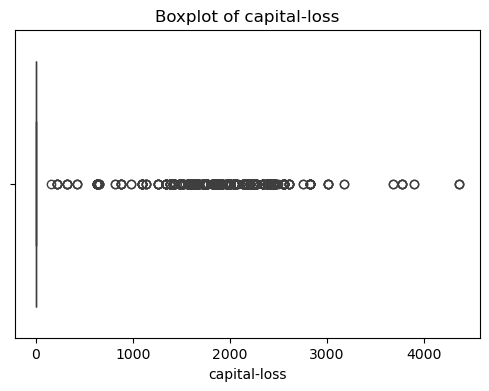

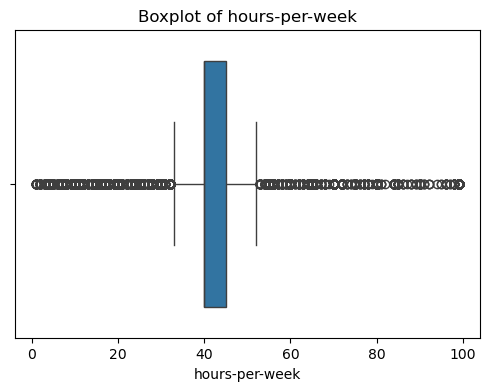

In [287]:
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


- Age is skewed to the right, majority of individuals being in 20s-40s 

- Most individuals fall between education levels 9-12, with very few low education levels appearing as outliers, indicating that the dataset is majority adults with mid level education.

- Both capital-gain and capital-loss are almost entirely zero values, with only a small number of individuals reporting positive values, appearing as extreme outliers. This indicates only a minority of individuals have investment-related income or losses

- Majority of individuals work 35-45 hours, with outliers working very low/very high hours, possibly being part-time/overtime workers.




### 2.3.2 Understanding relationship between variables

                      age  educational-num  capital-gain  capital-loss  \
age              1.000000         0.030940      0.077229      0.056944   
educational-num  0.030940         1.000000      0.125146      0.080972   
capital-gain     0.077229         0.125146      1.000000     -0.031441   
capital-loss     0.056944         0.080972     -0.031441      1.000000   
hours-per-week   0.071558         0.143689      0.082157      0.054467   

                 hours-per-week  
age                    0.071558  
educational-num        0.143689  
capital-gain           0.082157  
capital-loss           0.054467  
hours-per-week         1.000000  


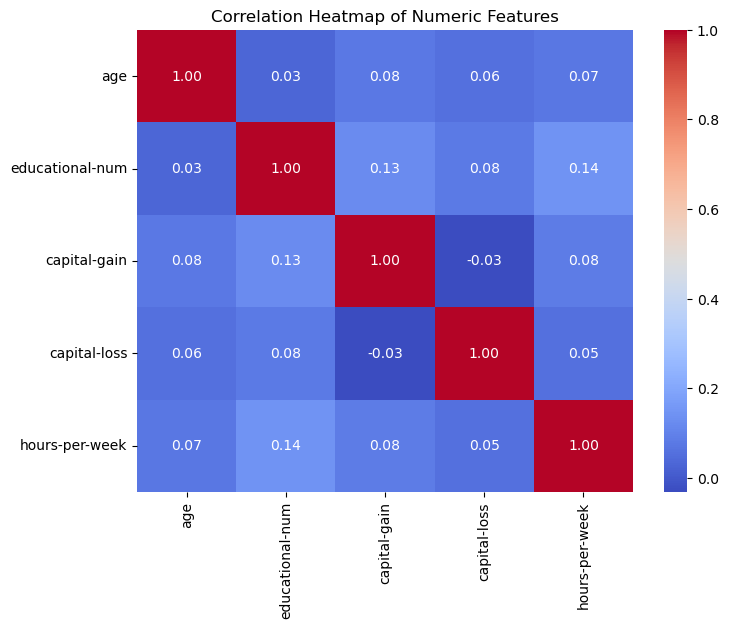

In [288]:
## Understanding relationship between variables


numerical_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

corr = df[numerical_features].corr()

print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Most features are only weakly correlated with each other. 

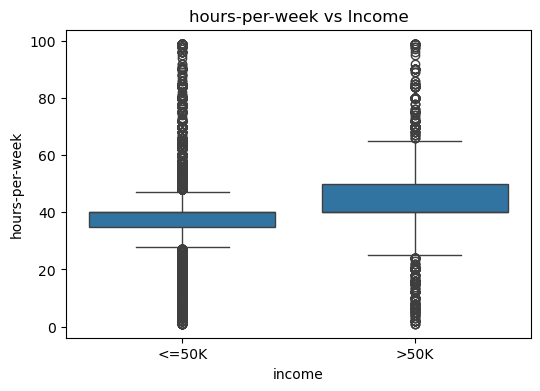

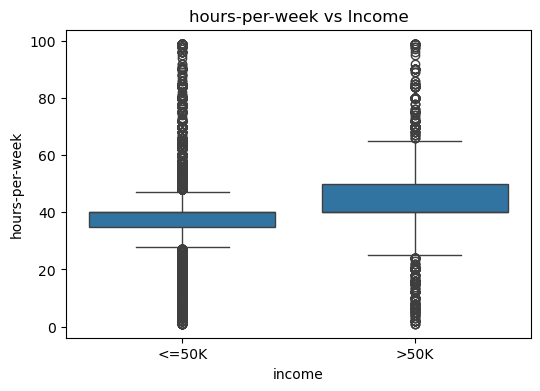

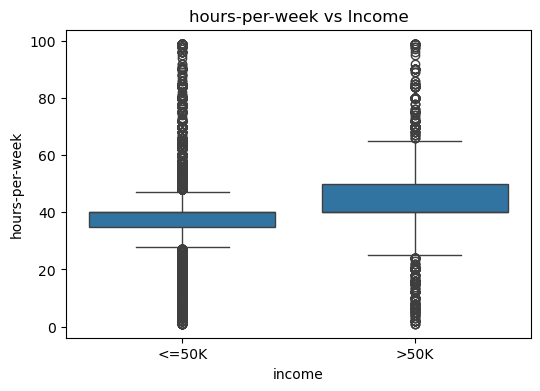

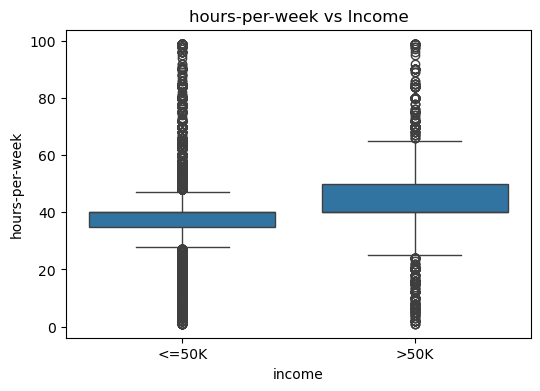

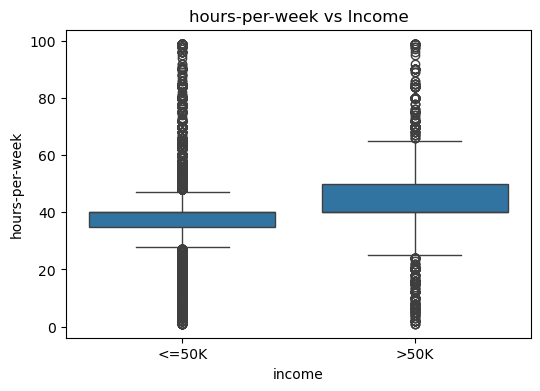

In [289]:
numerical_features = ['age', 'educational-num', 'hours-per-week', 'capital-gain', 'capital-loss']

for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='income', y=col, data=df)
    plt.title(f"{col} vs Income")
    plt.show()


Age vs Income: The median age for individuals earning less than 50k is around the mid-30s, with the individuals earning more than 50k around mid-40s. This indicates that higher income is associated with more years of age.

Educational-num vs Income: The median educational num for those earning more than 50k is around 12-13, while those earning less than 50k around the 9-10 range. This indicates that education has one of the strongest relationships with income, with higher education levels increasing the likelihood of earning more than 50k.

Hours per week vs Income: The median hours for those less than 50k are around 38-40, while those earning more are around 45. This indicates that those longer working hours tend to earn more.

Capital Gain vs Income: Both groups mostly have 0 capital gain, but those earning more than 50k has more non-zero values and much larger outliers. This indicates that any form of capital gain is a strong indicator of high income, as investment/business related activities that can generate capital gain are more common across higher income individuals.

Capital Loss vs Income: Similarly, both groups have mostly 0 capital loss, but those earning above 50k have slightly more non-zero values and overall slightly higher loss amounts. This indicates that higher income individuals are more likely to engage in investments/activities that can generate capital losses, but the relationship is weaker compared with capital gain.

# 3. Data Preparation

## 3.1 Data Cleaning

In [290]:
## Clean data
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [291]:
df = df.replace('?', pd.NA)
df = df.dropna()

Replaced missing values marked with ? as NaN, and removed the missing values they are only a small proportion of the total dataset.

In [292]:
df.columns
df = df.drop(columns=['fnlwgt', 'education'])


Dropped fnlwgt, a sample weight used for census which is not indicative of an individual, and dropped education in favor of educational-num to avoid reduncancy.

In [293]:
X = df.drop('income', axis=1) 
y = df['income'].map({'<=50K':0, '>50K':1})  

categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'gender']
                        
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

Categorical features were converted into numerical form using one-hot encoding. The target variable income was separated from the dataset and encoded as binary, with 0 representing <=50K and 1 representing >50K.


## 3.2 Train-Test Split

In [294]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



Dataset was split into training and testing set (80% to 20%). A stratified split was applied to ensure the proportion of income classes is maintained in both sets,which is important as the datadset is imbalanced, so maintaining the class proportions prevents biased model evaluation. Random state 42 was set for reproducibility.

In [295]:
from sklearn.preprocessing import StandardScaler
import numpy as np

num_features = ['age', 'educational-num', 'hours-per-week', 'capital-gain', 'capital-loss']



X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


for col in ['capital-gain', 'capital-loss']:
    X_train_scaled[col] = np.log1p(X_train_scaled[col])
    X_test_scaled[col] = np.log1p(X_test_scaled[col])


scaler = StandardScaler()
X_train_scaled[num_features] = scaler.fit_transform(X_train_scaled[num_features])
X_test_scaled[num_features] = scaler.transform(X_test_scaled[num_features])

Skewed features capital-gain and capital-loss were log-transformed to reduce the effect of extreme outliers. All numeric features were then standardised using StandardScaler ensuring each feature has zero mean and unit variance, as the numeric features have different ranges (age from 17-90, capital gain reaching thousands, etc) which could affect modelling.

# 4. Modelling

### 4.2 Train Model

Logistic Regression Accuracy: 0.8381426202321725

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      6803
           1       0.71      0.58      0.64      2242

    accuracy                           0.84      9045
   macro avg       0.79      0.75      0.77      9045
weighted avg       0.83      0.84      0.83      9045


Confusion Matrix:
 [[6272  531]
 [ 933 1309]]


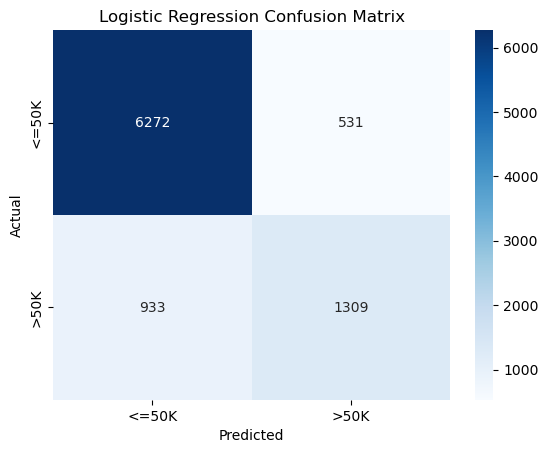

In [296]:
## Initialise and train model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


The Logistic Regression model achieved an overall accuracy of 84%, indicating that it correctly predicts the income class for the majority of individuals. However, performance differs between the classes:

For the ≤50K class (majority), the model achieved a high recall of 0.92, meaning most low-income individuals were correctly identified.

For the >50K class (minority), the recall is only 0.58, meaning around 42% of high-income individuals were misclassified.

This difference highlights a class imbalance issue, where the model is biased toward the majority class. From the business perspective of a financial institution, this could result in missing potential high-value customers eligible for premier banking or premium services.

Confusion Matrix Interpretation:

- True Negatives (≤50K): 6272 individuals correctly classified
- True Positives (>50K): 1309 individuals correctly classified
- False Positives (predicted >50K, actually ≤50K): 531
- False Negatives (predicted ≤50K, actually >50K): 933

The model performs well in identifying the majority class but struggles with the minority class. Overall, Logistic Regression provides a strong baseline, but its limited performance on the minority class indicates other models may be better suited to predict high-income individuals.

Decision Tree Accuracy: 0.8127142067440575

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      6803
           1       0.62      0.62      0.62      2242

    accuracy                           0.81      9045
   macro avg       0.75      0.75      0.75      9045
weighted avg       0.81      0.81      0.81      9045


Confusion Matrix:
 [[5970  833]
 [ 861 1381]]


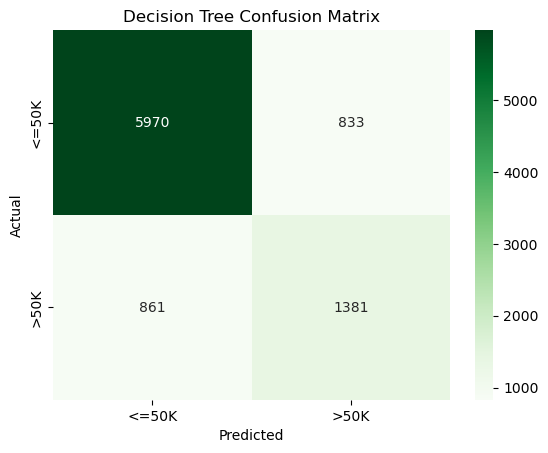

In [297]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


The Decision Tree model achieved an accuracy of 81.3%, which is slightly lower than the Logistic Regression model. The confusion matrix shows that the model correctly classified 5970 low-income individuals and 1381 high-income individuals.

Compared to Logistic Regression, the Decision Tree model achieved a higher recall for the >50K income class (0.62 vs 0.58), indicating an improved ability to identify high-income individuals. However, this improvement comes at the expense of an increased number of false positives (833 vs 531), where low-income individuals were incorrectly predicted as high-income.

From a business perspective, this trade-off may be acceptable in scenarios where identifying high-income individuals is more critical than avoiding false positives. However, the overall reduction in accuracy suggests that the Decision Tree may be more prone to overfitting and less stable compared to Logistic Regression.

Random Forest Accuracy: 0.8431177446102819

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6803
           1       0.71      0.62      0.66      2242

    accuracy                           0.84      9045
   macro avg       0.79      0.77      0.78      9045
weighted avg       0.84      0.84      0.84      9045


Confusion Matrix:
 [[6235  568]
 [ 851 1391]]


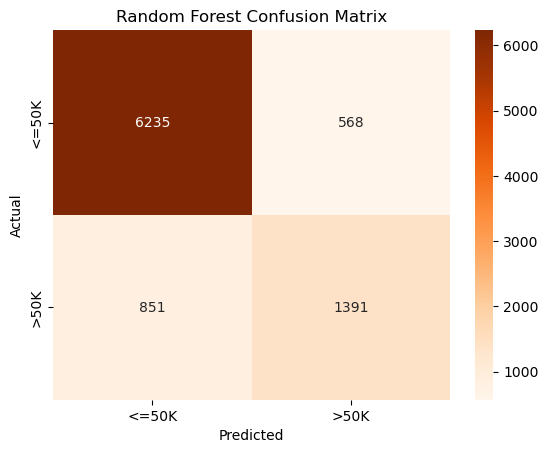

In [298]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


The Random Forest model achieved the highest overall accuracy of 84.3%, outperforming both Logistic Regression and Decision Tree. The confusion matrix indicates that the model correctly classified 6235 low-income individuals and 1391 high-income individuals.

The model achieved a recall of 0.62 for the >50K income class, which is higher than Logistic Regression and equal to Decision Tree, indicating improved detection of high-income individuals. At the same time, the number of false positives (568) is lower than the Decision Tree model, demonstrating better balance between identifying high-income individuals and avoiding incorrect predictions.

This indicates Random Forest is more reliable because it reduces overfitting and produces more stable, consistent predictions.

# 5. Model Evaluation

I evaluated 3 models: Logistic Regression, Decision Tree, and Random Forest.

Logistic Regression achieved strong overall accuracy but had lower recall for the high-income class, meaning it was less effective at identifying individuals earning more than 50K.

Decision Tree improved recall for high-income individuals but had lower overall accuracy and more false positives, suggesting it may overfit the training data.

Random Forest achieved the best balance, with accuracy of 84.3%, improved recall for the high-income class (0.62), and fewer false positives compared to the Decision Tree. Because it combines multiple decision trees, Random Forest reduces overfitting and provides more stable, reliable predictions.

Based on these results, I selected the Random Forest model because it provides the most reliable and balanced performance, effectively supporting the business goal of accurately identifying individuals earning more than $50K.

## Iterative model development


                              feature  importance
0                                 age    0.233933
1                     educational-num    0.125597
4                      hours-per-week    0.116742
2                        capital-gain    0.113748
12  marital-status_Married-civ-spouse    0.090669
3                        capital-loss    0.039173
14       marital-status_Never-married    0.026860
19         occupation_Exec-managerial    0.024011
30         relationship_Not-in-family    0.020635
79                        gender_Male    0.019831


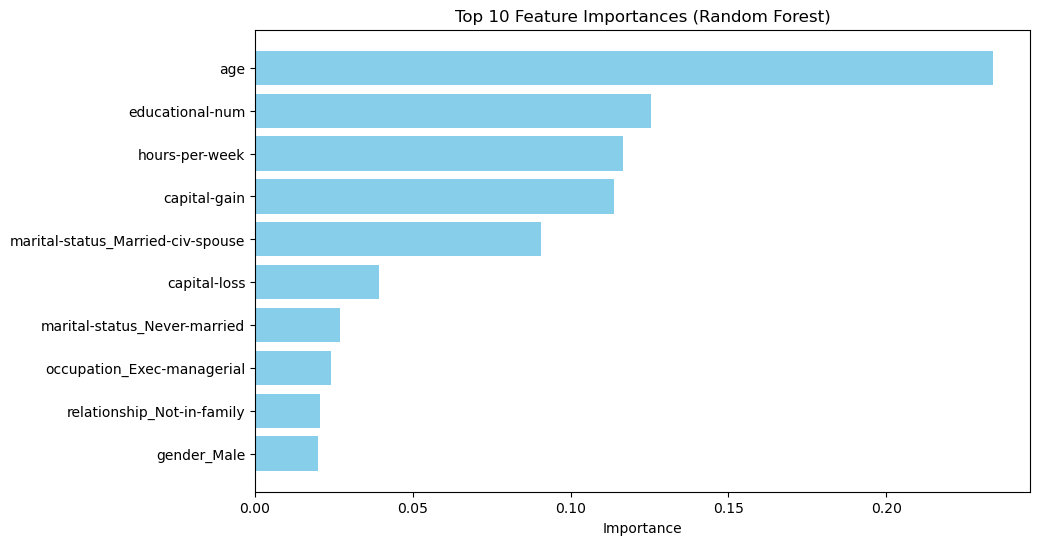

In [299]:
## Further feature engineering / feature selection

import pandas as pd
import matplotlib.pyplot as plt


feature_importances = rf.feature_importances_  
features = X_train_scaled.columns

importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importances
})


importance_df = importance_df.sort_values(by='importance', ascending=False)


print(importance_df.head(10))

plt.figure(figsize=(10,6))
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()


The most important features are age, educational-num, hours-per-week, capital-gain, and marital-status_Married-civ-spouse, indicating that older individuals with higher education, more work hours, and higher capital gains are more likely to earn above 50K.

Features such as capital-loss, marital-status_Never-married, occupation_Exec-managerial, relationship_Not-in-family, and gender_Male have lower importance scores, suggesting that they contribute minimally to the model’s predictions.

Based on this analysis, I removed the low-importance features (gender_Male, relationship_Not-in-family, occupation_Exec-managerial) to simplify the model and reduce noise. 

In [300]:
low_importance_features = ['gender_Male', 'relationship_Not-in-family', 'occupation_Exec-managerial']

X_train_selected = X_train_scaled.drop(columns=low_importance_features)
X_test_selected = X_test_scaled.drop(columns=low_importance_features)

Random Forest Accuracy after feature selection: 0.8443338861249309
F1-score: 0.6625119846596357

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6803
           1       0.72      0.62      0.66      2242

    accuracy                           0.84      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.84      0.84      9045


Confusion Matrix:
 [[6235  568]
 [ 851 1391]]


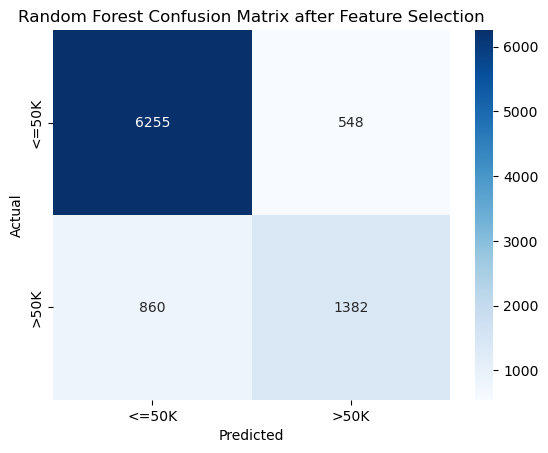

In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_selected.predict(X_test_selected)


print("Random Forest Accuracy after feature selection:", accuracy_score(y_test, y_pred_selected))
print("F1-score:", f1_score(y_test, y_pred_selected))
print("\nClassification Report:\n", classification_report(y_test, y_pred_selected))


cm_selected = confusion_matrix(y_test, y_pred_selected)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix after Feature Selection")
plt.show()

After removing low-importance features (gender_Male, relationship_Not-in-family, occupation_Exec-managerial), the Random Forest model was retrained on the reduced feature set. The model’s accuracy remained stable at 0.844, and the F1-score for the high-income class (>50K) slightly increased to 0.662. The confusion matrix shows that the numbers of correctly predicted low- and high-income individuals stayed largely the same.

This indicates that the removed features contributed very little to the model’s predictions,as the model’s decisions are dominated by the top predictive features. Removing the low-importance features did not noticeably improve performance, but it simplifies the model and makes it easier to interpret without sacrificing predictive power.

Best Parameters: {'n_estimators': 300, 'max_depth': 20}
Tuned Random Forest Accuracy: 0.8578220011055832

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      6803
           1       0.78      0.59      0.67      2242

    accuracy                           0.86      9045
   macro avg       0.83      0.77      0.79      9045
weighted avg       0.85      0.86      0.85      9045


Confusion Matrix:
 [[6431  372]
 [ 914 1328]]


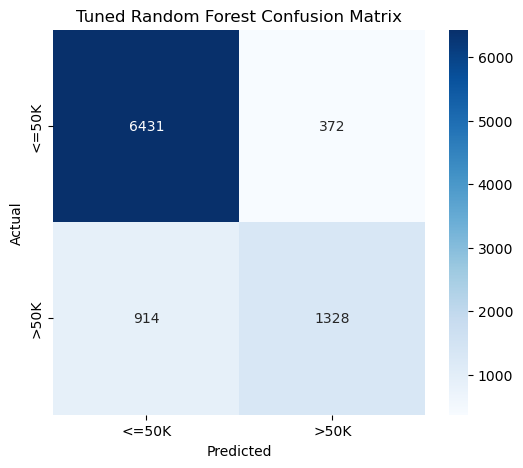

In [302]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report


rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}


rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=9, 
    cv=5,
    scoring='f1',  
    random_state=42,
    n_jobs=1
)


rf_random.fit(X_train_scaled, y_train)


print("Best Parameters:", rf_random.best_params_)

y_pred_tuned = rf_random.predict(X_test_scaled)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))



from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:\n", cm_tuned)


plt.figure(figsize=(6,5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()


After performing hyperparameter tuning using RandomizedSearchCV with 5-fold cross-validation, the optimal parameters identified for the Random Forest model were n_estimators = 300 and max_depth = 20. These settings increase the number of decision trees to improve model stability while limiting tree depth to reduce overfitting.

The tuned model achieved an accuracy of 0.858, which is higher than the baseline Random Forest performance. The classification report shows strong performance for the <=50K class with an F1-score of 0.91, while the >50K class achieved an F1-score of 0.67, indicating moderate improvement in identifying higher-income individuals.

From the confusion matrix, the model correctly classified 6431 individuals as earning <=50K and 1328 individuals as earning >50K. However, 914 high-income individuals were misclassified as <=50K, suggesting that predicting the minority class remains challenging due to class imbalance. At the same time, false positives were reduced, meaning the model became more conservative when predicting high-income status.

Overall, the tuned Random Forest demonstrates improved generalisation performance compared to the baseline model. Increasing the number of trees helped reduce variance, while constraining the maximum depth prevented excessive complexity. Based on the improved accuracy and balanced F1-score, I selected this as the final model for deployment.


In [303]:
import joblib

# Save final tuned model
joblib.dump(rf_random.best_estimator_, "final_random_forest_model.pkl")

print("Final model saved successfully.")


Final model saved successfully.
